# INFO 2950 Phase II

Team: 
Carter Zhu (yz553)
Jase Rivera (jcr297)
Matthew Mentis-Cort (mam692)


## Research Questions

How does government expenditure on education impact long-term economic growth and unemployment in developing versus developed countries?

How have unemployment rates changed over time in low-income countries?

What are the trends in GDP growth across different countries, and how have they fluctuated in response to global economic events?

## Introduction

This EDA uses data from the World Bank Group to explore economic trends across different countries from 1965 to 2023. The dataset includes key factors such as unemployment rates, GDP growth, and government expenditure on education. The goal of this analysis is to discover patterns and relationships that emphasize economic performance in the world.

In this EDA, our goal is to identify key patterns and trends related to global economic inequality and development. The analysis will show which countries have reduced unemployment and increased GDP growth, as well as if investments in education correspond to these outcomes.


## Data Description

**What are the observations (rows) and the attributes (columns)?**

Observations (Rows): Each row in the dataset corresponds to a country and a specific economic indicator (e.g., GDP growth, government expenditure on education, or unemployment) for mulitple years(1965-2023). The rows are structured with country-level data, showing trends and changes in economic indicators over time.

Attributes (Columns):
Country Name: The name of the country.
Country Code: A unique identifier for each country (ISO or similar).
Series Name: The economic indicator (e.g., GDP growth, unemployment, government expenditure on education).
Year Columns: Yearly data points from 1965 to 2023, where each column represents the recorded value of the economic indicator for that specific year.

**Why was this dataset created?**

The dataset was created to track economic performance and trends in different countries over time. The data helps governments, policymakers, economists, and international organizations understand key economic metrics such as GDP growth, government expenditure on education, and unemployment rates, which can guide economic development strategies and interventions in different regions of the world. 

**Who funded the creation of the dataset?**

The dataset was funded and crafted by The World Bank, a global financial institution that supports development efforts in countries world-wide. Its mission is to reduce poverty and promote sustainable development so the World Bank regularly collects and publishes data on a wide range of economic indicators to aid in policy-making and development planning.

**What processes might have influenced what data was observed and recorded and what was not?**

Data availability and reliability: Some countries may not have consistent or complete data records due to political instability, inadequate infrastructure, or limited data collection capabilities. This can lead to missing or incomplete data for certain years.

Selection of indicators: The choice of economic indicators included in the dataset (e.g., GDP growth, unemployment, government expenditure) reflects the focus areas of development agencies and governments. I believe these indicators chosen are deemed critical and essential for assessing economic health.

Reporting standards: Differences in national reporting standards and data collection methods could lead to variations in data quality and coverage.

Bias in data recording: Some data points may reflect self-reported figures from governments, which could be subject to political influence or reporting biases, particularly in countries where transparency or accurate reporting is less enforced.

**What preprocessing was done, and how did the data come to be in the form that you are using?**

The original data consisted of four datasets grouped by income level of the countries(low_income, lower_middle, upper_middle, high_income) to distinguish between developing and developed countries. Preprocessing was done to standardize economic indicators and ensure consistency across countries and years.

First, only the relevant economic indicators—GDP growth, government expenditure on education, and unemployment—were retained. Rows missing essential information like Country Name, Country Code, or Series Name were removed. Year columns from 1960 to 1964 were excluded due to data quality issue, and non-numeric values like ".." were replaced with NaN.

To handle missing values,linear interpolation was used to estimate missing data based on adjacent trends. Remaining NaN rows were dropped as there was too many missing data for linear interpolation to work well, and a new column, country_type, was added to label each country based on its income group. Finally, all datasets were merged into a single dataset for analysis.

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

Data collection for this type of dataset is typically done through government reporting mechanisms and international data collection efforts, not directly involving individuals. Governments or institutions contributing data likely understood that the information would be used for development assessments, economic planning, and research purposes. However, the individuals whose economic data are aggregated (e.g., unemployment figures) may not be aware of the specific data collection.


**Where can your raw source data be found, if applicable? Provide a link to the raw data.**

The four original dataset that we merged along with the final_dataset is in the google drive. we have also uploaded it to github.

https://drive.google.com/drive/folders/1Ka6LAx-YR8TA3QkG9799JndAbxd8Jlio?usp=sharing
https://databank.worldbank.org/source/world-development-indicators#


## Imports

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning and Preprocessing

In [68]:

def clean_dataset(data, country_type_label):
    
    """
    The clean_dataset function takes a dataset and 
    a country type label as inputs,filters the dataset
    to include only specific economic indicators, cleans
    the data by dropping irrelevant or missing columns,
    interpolates missing values for years where applicable,
    and finally returns a cleaned dataset with an additional 
    column for the country type.

    Parameters:
    data: A pandas DataFrame containing raw data with 
    economic indicators for various countries and years.
    
    country_type_label: A string that labels the dataset 
    based on the income level of the country (e.g., 
    'low_income', 'lower_middle', 'upper_middle', 'high_income').

    """
    #variables we are interested in
    indicators = [
        'GDP growth (annual %)',
        'Government expenditure on education, total (% of GDP)',
        'Unemployment, total (% of total labor force) (modeled ILO estimate)'
    ]
    # filter to only include specific economic indicators we are interested in
    cleaned_data = data[data['Series Name'].isin(indicators)]
    
    cleaned_data = cleaned_data.dropna(subset=['Country Name', \
                                    'Country Code', 'Series Name'])

    #has too many missing values to be useful
    columns_to_drop = ['1960 [YR1960]', '1961 [YR1961]', '1962 [YR1962]', \
                       '1963 [YR1963]', '1964 [YR1964]']
    cleaned_data = cleaned_data.drop(columns=columns_to_drop, errors='ignore')

    
    year_columns = [col for col in cleaned_data.columns \
                    if col.split()[0].isdigit()]
    cleaned_data[year_columns] =\
    cleaned_data[year_columns].replace("..", pd.NA).apply(pd.to_numeric, errors='coerce')

    #linear interpolation to fill in NA
    cleaned_data[year_columns] =\
    cleaned_data[year_columns].interpolate(method='linear', axis=0)
    #drop any remaining NA rows
    cleaned_data = cleaned_data.dropna()
    #add in a col to label each country's income level
    cleaned_data['country_type'] = country_type_label
    return cleaned_data

#the four data source each with different income levels of countries
file_paths = [
    '94086144-6ad8-4b75-ac26-1b60a764018a_Data.csv',  
    '3fd493b6-dfe0-4afd-b296-1b5892e64ba8_Data.csv',  
    '579772b1-602f-4cf6-ac0b-1bb1289918f8_Data.csv',  
    '5026bb4a-f8ac-4ee9-860c-f83d47a7aded_Data.csv' 
]

country_types = ['low_income', 'lower_middle', 'upper_middle', 'high_income']

cleaned_datasets = []

#cleaning each file and merging in to one 
for file_path, country_type in zip(file_paths, country_types):
    data = pd.read_csv(file_path)
    cleaned_data = clean_dataset(data, country_type)
    cleaned_datasets.append(cleaned_data)

merged_data = pd.concat(cleaned_datasets, ignore_index=True)
merged_file_path = 'final_cleaned_data.csv'
#merged_data.to_csv(merged_file_path, index=False)

print(merged_data.shape)
merged_data.head()


(623, 64)


,Country Name,Country Code,Series Name,Series Code,1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],...,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],country_type
0,Burkina Faso,BFA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.764545,0.537613,8.823315,3.070774,2.026081,0.117020,...,3.921229,5.957977,6.203489,6.604569,5.889205,2.010773,6.939155,1.777915,2.960180,low_income
1,Burkina Faso,BFA,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,3.832105,1.896073,10.489383,1.947888,0.864207,7.186570,...,3.670090,3.656988,5.628470,5.488610,5.407000,5.151000,5.224000,5.277000,1.945090,low_income
2,Burundi,BDI,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,3.899666,3.254533,12.155451,0.825002,-0.297667,14.256120,...,1.444000,1.356000,1.258000,1.157000,1.053000,1.030000,1.110000,0.919000,0.930000,low_income
3,Burundi,BDI,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.967226,4.612993,13.821519,-0.297884,-1.459541,21.325671,...,-3.900000,-0.600001,0.500001,1.609935,1.812565,0.327157,3.100000,1.848999,2.700001,low_income
4,Burundi,BDI,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,2.960677,3.290257,10.773217,0.269449,1.390820,14.994741,...,6.371340,4.692000,4.762020,5.078650,5.347000,5.322000,4.871000,4.821000,4.493000,low_income


The data cleaning process involved multiple structured steps to ensure consistency, completeness, and proper formatting of the data for analysis. First, the datasets were filtered to include only relevant economic indicators: GDP growth (annual %), Government expenditure on education (total % of GDP), and Unemployment (total % of labor force, modeled ILO estimate). Any rows missing essential identifying information, such as Country Name, Country Code, or Series Name, were removed to maintain data integrity.

Next, columns for the years 1960 to 1964 were removed as these years has too many missing values for it to be useful. The year columns were then converted to numeric values, replacing non-numeric placeholders like ".." with NaN, allowing for proper numeric operations.

Following this, linear interpolation was used to estimate missing values based on the trends of adjacent data points. After this, any remaining rows with NaN values were dropped to ensure a clean dataset.Finally, a new column, country_type, was added to each dataset, labeling countries based on the file they came from (e.g., low_income, lower_middle, upper_middle, and high_income). After cleaning each individual dataset, the datasets were concatenated into a single merged dataset

## Data Analysis

We built a summary table to show statistics for each of our variables of interest, GDP growth, government expenditure, and unemployment. This gives us an idea of how many points we have in the dataset, and some of the extremes and summary statistics for each of our variables. The maxes for each variable are particularly interesting because it shows us that we have poential outliers to account for in the future (e.g. max unemployment percent of $82\%$).

The data shows significant variability in global economic indicators:

GDP growth averages 3.88%, with large fluctuations (std: 6.74)
Government expenditure on education averages 4.7% of GDP
Unemployment rate averages 6.04%, with wide variability (std: 6.26)

In [69]:
data=  pd.read_csv('final_cleaned_data.csv')

#specific economic indicators 
key_metrics = ['Unemployment, total (% of total labor force) (modeled ILO estimate)',
               'GDP growth (annual %)',
               'Government expenditure on education, total (% of GDP)']

#all the years we are analyzing 
years_columns = [f"{year} [YR{year}]" for year in range(1965, 2024)]


#reshape data so year becomes rows instead of columns
time_data_full = data[data['Series Name'].isin(key_metrics)].melt\
(id_vars=['Country Name', 'country_type', 'Series Name'], \
value_vars=years_columns, var_name='Year', value_name='Value')

summary_data = time_data_full[time_data_full['Series Name'].isin([
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "GDP growth (annual %)",
    "Government expenditure on education, total (% of GDP)"
])]

summary_data_pivot = summary_data.pivot_table(index=\
                ['Country Name', 'Year', 'country_type'], \
                                        
                 columns='Series Name', values='Value').dropna()

summary_statistics = summary_data_pivot.describe()
#summary_data_pivot.head()
summary_statistics

Series Name,GDP growth (annual %),"Government expenditure on education, total (% of GDP)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
count,12331.000000,12331.000000,12331.000000
mean,3.888494,4.698497,6.042230
std,6.744425,5.162471,6.255983
min,-64.047107,-51.030865,-51.030865
25%,1.429953,2.677334,2.789146
50%,3.896714,4.431070,4.977000
75%,6.366926,6.275724,8.317796
max,153.492641,86.543820,81.887797


Because we are interested in the trends for each income group, we made some lineplots showing how GDP Growth, government expendiure, and unemployment change over time. Making these charts allows us to see commonalities between variables in various time periods. We can compare the trends of the lines between plots for different variables to see which ones have similar trends over time.

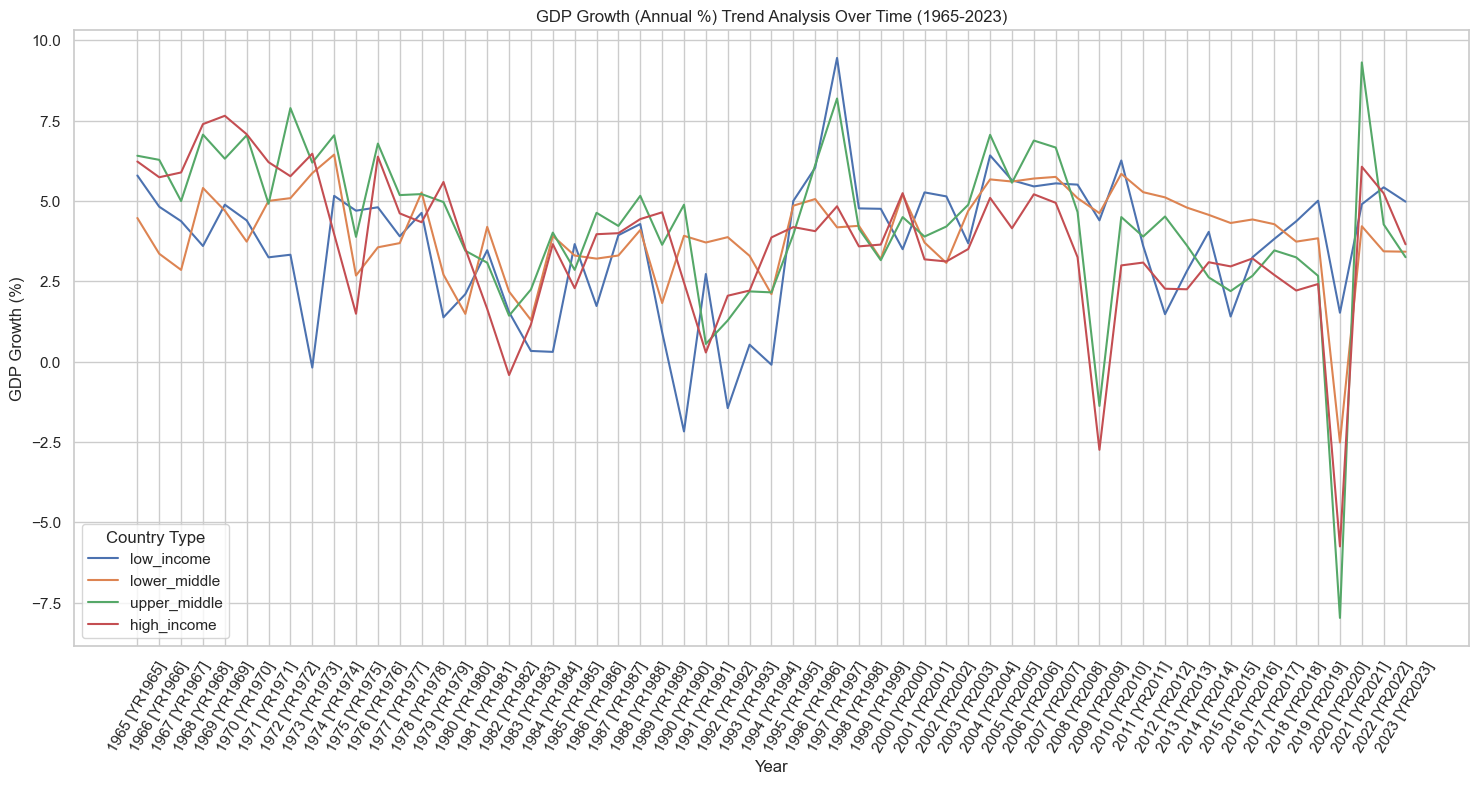

In [70]:
#GDP Growth (Annual %) Trend Analysis Over Time (1965-2023)

key_metrics = ['Unemployment, total (% of total labor force) (modeled ILO estimate)',
               'GDP growth (annual %)',
               'Government expenditure on education, total (% of GDP)']

years_columns = [f"{year} [YR{year}]" for year in range(1965, 2024)]
time_data_full = data[data['Series Name'].isin(key_metrics)].melt\
(id_vars=['Country Name', 'country_type', 'Series Name'],\
 value_vars=years_columns, var_name='Year', value_name='Value')

gdp_data = time_data_full[time_data_full['Series Name'] == "GDP growth (annual %)"]
plt.figure(figsize=(18, 8))
sns.lineplot(data=gdp_data, x="Year", y="Value", \
hue="country_type", markers=True, dashes=False, errorbar = None)
plt.title("GDP Growth (Annual %) Trend Analysis Over Time (1965-2023)")
plt.ylabel("GDP Growth (%)")
plt.xlabel("Year")
plt.xticks(rotation =60)
plt.legend(title='Country Type')
plt.grid(True)
plt.show()

The chart shows that while all countries experience cyclical economic growth, low-income countries are more vulnerable to economic instability and take longer to recover from economic downturns. In contrast, high-income and upper-middle-income countries tend to have more stable growth patterns, with faster recovery times from global emergencies. Major dips in 2008-2009 (financial crisis) and 2020 (COVID-19) affected all groups, but low-income nations were hit harder. Recently, there's a strong recovery across all country types, though the growth is not fully stabilized yet.


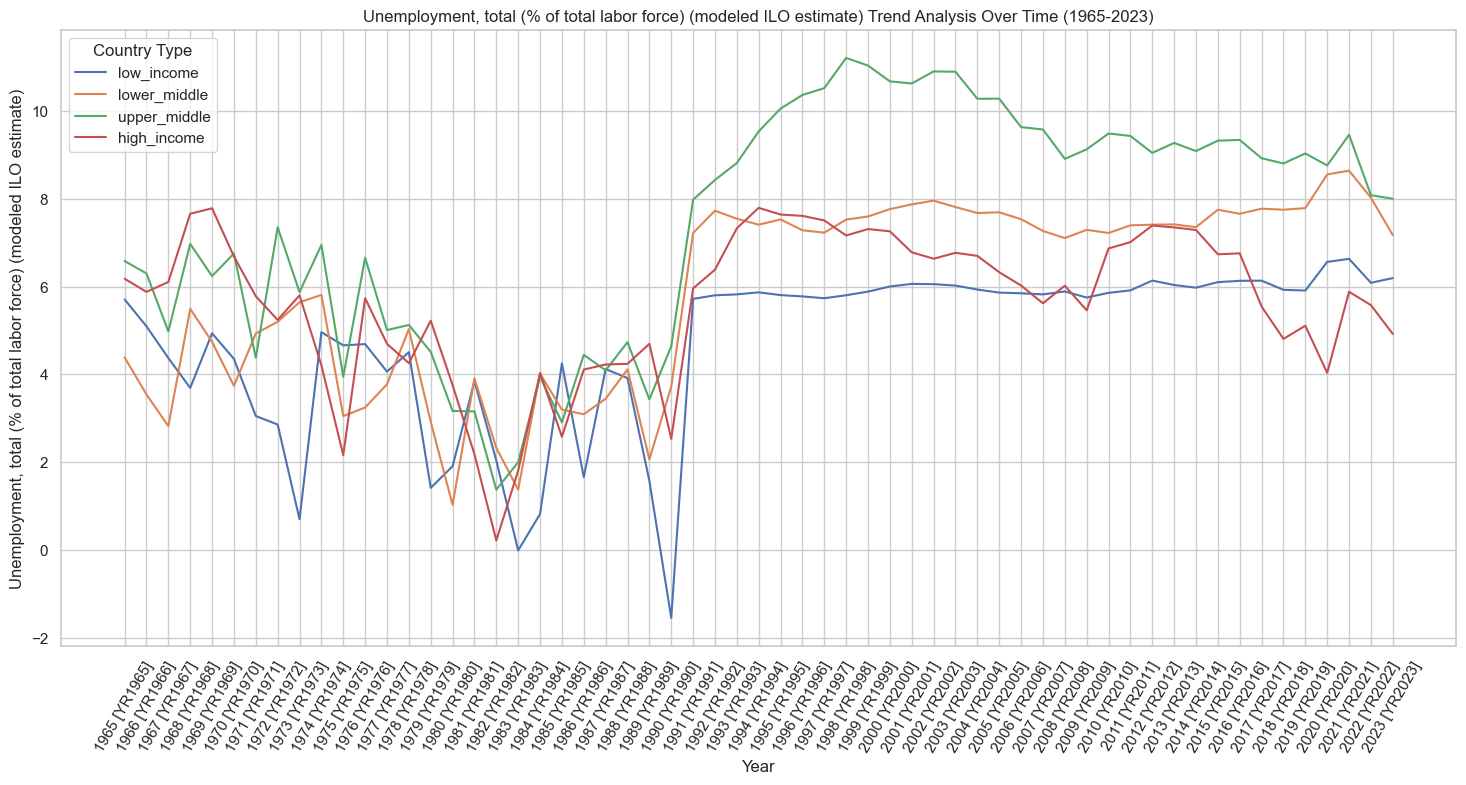

In [71]:
#Unemployment, total (% of total labor force) (modeled ILO estimate) Trend Analysis Over Time (1965-2023)

education_data_full = time_data_full[time_data_full['Series Name'] \
== "Unemployment, total (% of total labor force) (modeled ILO estimate)"]
plt.figure(figsize=(18, 8))
sns.lineplot(data=education_data_full, x="Year", y="Value", \
hue="country_type", markers=True, dashes=False, errorbar = None)
plt.title("Unemployment, total (% of total labor force) \
(modeled ILO estimate) Trend Analysis Over Time (1965-2023)")
plt.ylabel("Unemployment, total (% of total labor force) (modeled ILO estimate)")
plt.xlabel("Year")
plt.xticks(rotation = 60)
plt.legend(title='Country Type')
plt.grid(True)
plt.show()

This chart shows differences in how unemployment rates are across country income levels; upper-middle-income countries show continuous issues in the labor market. High-income countries recover more quickly after global recessions, while low-income countries exhibit more stability in unemployment rates, although it is possible that this could be due to data limitations or a high level of informal employment. Furthermore, high-income countries consistently having the lowest unemployment, while upper-middle-income countries experienced a significant spike around the 1990s but have since improved. The data also highlights the global impact of events like the 1980s recession, the 2008 financial crisis, and the 2020 pandemic.


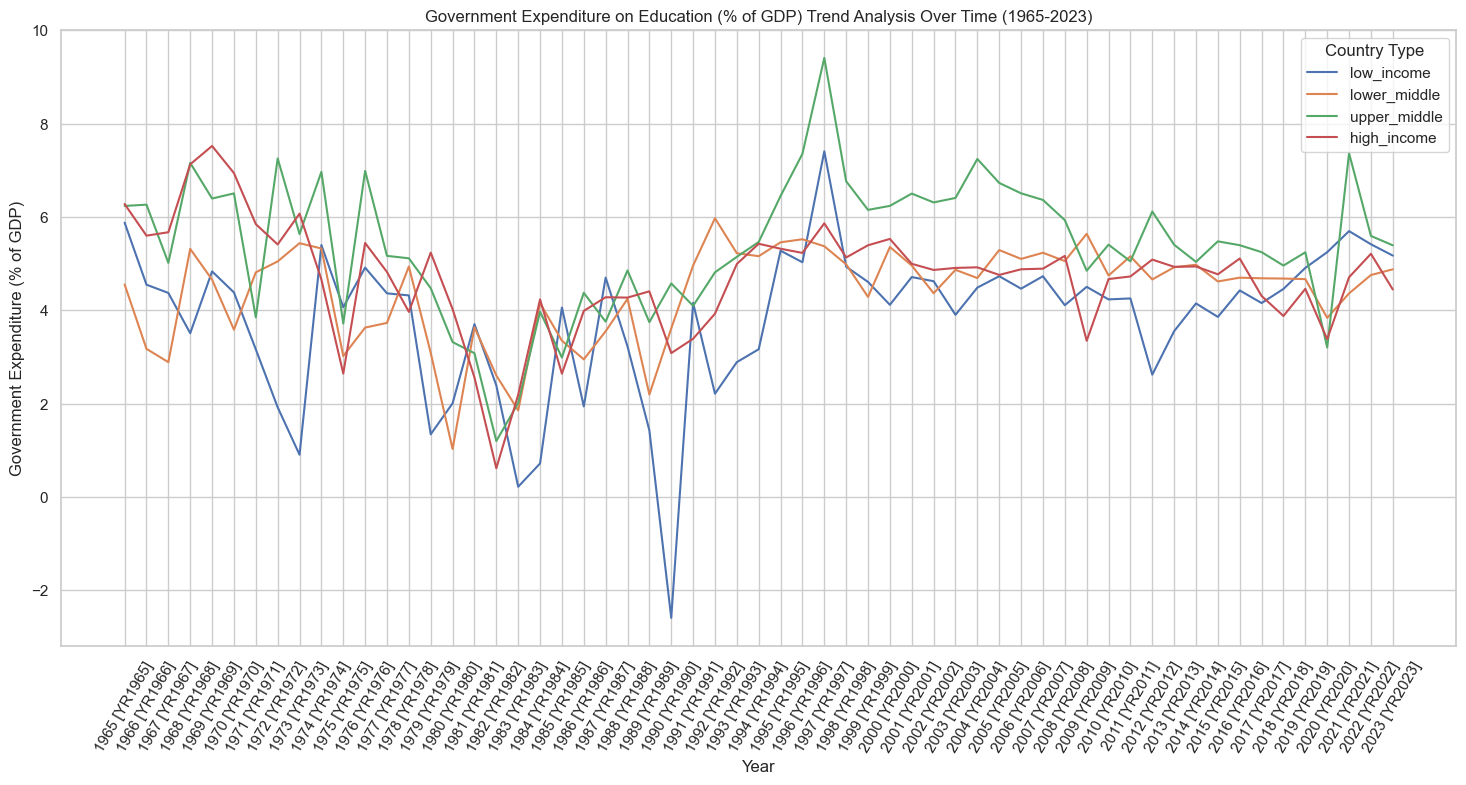

In [72]:
#Government Expenditure on Education (% of GDP) Trend Analysis Over Time (1965-2023)

education_data_full = time_data_full[time_data_full['Series Name'] \
== "Government expenditure on education, total (% of GDP)"]
plt.figure(figsize=(18, 8))
sns.lineplot(data=education_data_full, x="Year", y="Value",\
hue="country_type", markers=True, dashes=False, errorbar = None)
plt.title("Government Expenditure on Education (% of GDP) \
Trend Analysis Over Time (1965-2023)")
plt.ylabel("Government Expenditure (% of GDP)")
plt.xlabel("Year")
plt.xticks(rotation = 60)
plt.legend(title='Country Type')
plt.grid(True)
plt.show()

Upper-middle-income countries consistently spend the **most on education**, especially after the 1990s. High- and lower-middle-income countries have **stable spending** between **4-6%** of GDP. Low-income countries show **more volatility** with sharp drops in the 1990s but recovery afterward.

We also want to observe the correlation between variables to examine which variables may have a relationship. From the correlation heat map below, we observe that GDP growth and government expenditure and government expenditure and unemployment have higher than 0.7 correlation coefficients, suggesting that they effect each other in a real life for the areas in our dataset.

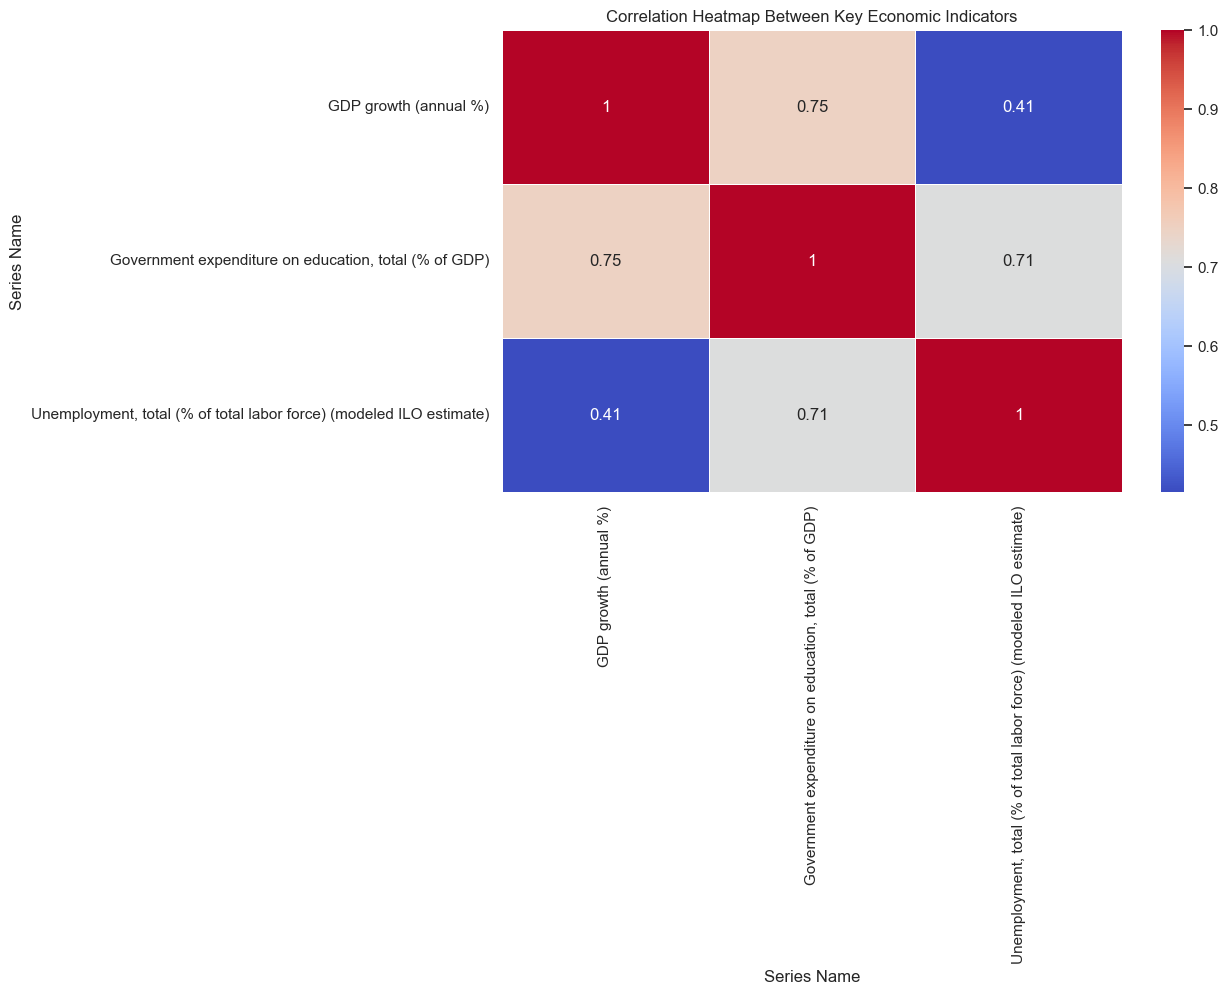

In [73]:
#Correlation Heatmap Between Key Economic Indicators

corr_data = time_data_full[time_data_full['Series Name'].isin([
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "GDP growth (annual %)",
    "Government expenditure on education, total (% of GDP)"
])]
corr_data_pivot = corr_data.pivot_table(index=['Country Name',\
            'Year', 'country_type'], columns='Series Name', values='Value')
correlation_matrix = corr_data_pivot.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap Between Key Economic Indicators")
plt.show()


The heatmap shows strong positive correlations between GDP growth and education spending (0.75), and a strong negative correlation between education spending and unemployment (0.71). There’s also a moderate negative correlation between GDP growth and unemployment (0.41). This suggests a very interesting insight: higher education spending is linked to both higher growth and lower unemployment.

It reveals the relationships between economic growth, education investment, and labor market outcomes. While education spending correlates positively with both GDP growth and unemployment, the long-term benefits of the investments mae take more time to materialize, specifically in improving labor market conditions. Countries experiencing fast GDP growth may also face a temporary increase in unemployment becuase of shifts in labor demand, especially during periods of economic change or technological advancement.

## Data Limitations

* Missing Data: Some countries have incomplete data for certain years due to gaps in reporting, which may result in missing or estimated values that do not fully reflect actual conditions.
* Bias in Self-Reporting: Data from governments may be subject to reporting biases, especially in politically sensitive areas such as unemployment or economic growth. For example, some participants may not fill out the information accurately. 
* Limited Detail: The dataset contains national-level data, which may overlook regional disparities within countries.
* Interpolation: Filling in missing data using interpolation may introduce trends that do not accurately reflect economic realities.

## Questions for Reviewers

* Do the charts clearly represent the trends in income inequality and poverty across the different groups?
* Are there any key variables or relationships that need further exploration/analysis to answer the research question?
* is Linear Interpolation the best method to fill in missing data here and if so should the axis be the column(countries) or the row(years)?

## Resources

Dataset: https://databank.worldbank.org/source/world-development-indicators#
Data Manipulation Technique: https://www.geeksforgeeks.org/interpolation-in-python/